In [1]:
from fastai.text import *
import numpy as np
from nltk import word_tokenize

In [2]:
class MalyalamTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.re1 = re.compile(r'  +')
    
    def fixup(self, x):
        x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
            ' @-@ ','-').replace('\\', ' \\ ').replace('\u200d','').replace('\xa0',' ').replace(
            '\u200c','').replace('“',' ').replace('”',' ').replace('"',' ').replace('\u200b','')
        x = re.sub('[\(\[].*?[\)\]]', '', x)
        x = re.sub('<[^<]+?>', '', x)
        x = re.sub('[A-Za-z]+','ENG ', x)
        x = re.sub(r'\d+.?(\d+)?','NUM ',x).replace("(","").replace(")","")
        return self.re1.sub(' ', html.unescape(x))

        
    def tokenizer(self, t:str) -> List[str]:
        t = self.fixup(t)
        return word_tokenize(t)

In [3]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [4]:
data_lm = TextLMDataBunch.from_csv(path='wiki/ml/',csv_name="train.csv",test="val.csv",header=None,
                                   tokenizer=tokenizer,text_cols=0)

In [5]:
data_lm.show_batch()

idx,text
0,"നേരെ xxunk അതിനു പുറമേ xxunk ചെയ്യുന്നത് . xxup eng xxunk ഇന്ത്യൻ ജനത xxunk വടക്കേ അമേരിക്കയിൽ xxunk xxunk ഭാഷ xxunk തദ്ദേശീയ അമേരിക്കൻ ഇന്ത്യൻ വംശക്കാരുടെ ഒരു കൂട്ടമാണ് . ചരിത്രപരമായി ഇവർ ജീവിച്ചിരുന്ന മേഖല , xxunk തടാകത്തിന് xxunk . ഈ ജനത , xxup num നും xxup num ും ഇടയ്ക്കു നടന്ന അമേരിക്കൻ xxunk മുമ്പ് xxunk ഏറ്റവും പടിഞ്ഞാറേ അറ്റത്ത് ന്യൂയോർക്ക് പ്രദേശത്ത് നിലവിലിരുന്ന സിക്സ് നേഷൻസ് അഥവാ xxunk ലീഗ് എന്നറിയപ്പെട്ടിരുന്ന ദീർഘകാല xxunk . xxunk ലീഗിലെ മറ്റ് അംഗരാഷ്ട്രങ്ങൾ xxunk"
1,. പവർ ആൻഡ് എനർജി ലിമിറ്റഡ് എന്ന മലേഷ്യൻ കമ്പനിയിൽ നിന്ന് ഒരു സിംഗപ്പൂർ കമ്പനിയെ xxunk പാമോയിൽ ഇറക്കുമതി ചെയ്തതിൽ xxunk ഉണ്ടെന്ന് xxunk ഈ കേസ് . മുൻ ചീഫ് വിജിലൻസ് xxunk പി ജെ തോമസ് ആയിരുന്നു അക്കാലത്ത് കേരളത്തിലെ സിവിൽ xxunk സെക്രട്ടറി . പ്രസ്തുത കേസിൽ എട്ടാം പ്രതിയായിരുന്ന അദ്ദേഹം ചീഫ് വിജിലൻസ് xxunk തുടരുന്നത് xxunk സുപ്രീം കോടതി xxunk അദ്ദേഹം xxup num മാർച്ചിൽ xxunk രാജി xxunk . കേസ് . അന്താരാഷ്ട്ര മാർക്കറ്റിൽ xxunk വില xxunk xxup num xxunk അക്കാലത്ത് xxunk xxup
2,ആൽബം ഇന്ത്യയിലെ ഏറ്റവും വലിയ xxunk . ആദ്യ ആൽബത്തിന്റെ xxup num ലക്ഷം കോപ്പികളാണ് ലോകത്താകമാനം xxunk . xxunk xxunk സിനിമാ ലോകത്തിനും നിരവധി ഹിറ്റ് ഗാനങ്ങൾ xxunk xxunk . xxunk സംഗീതം നിലനിൽക്കുന്ന ഒരു കുടുംബത്തിലാണ് xxunk xxunk ജനിച്ചത് . xxup num xxunk xxup num ന് ബീഹാറിലെ xxunk ജനനം . ആദ്യകാലങ്ങളിൽ സ്വാധീനിച്ചത് രക്ഷിതാക്കൾ തന്നെയായിരുന്നു . അവർ അദ്ദേഹത്തെ ഗുരു ഗ്രന്ഥ് xxunk രാഗങ്ങളും ശബ്ദങ്ങളും പഠിപ്പിച്ചു . ഇന്ത്യൻ xxunk പട്യാല xxunk രീതിയിൽ xxunk അദ്ദേഹം പതിനൊന്നാം വയസ്സിൽ xxunk . xxunk
3,"വിഭാഗത്തിന്റെ xxunk അമേരിക്കൻ xxunk പുസ്തക മേഖലയിൽ അത് ആധിപത്യം സ്ഥാപിക്കുന്നതിനും കാരണമായി . xxup eng ട്രൈ xxunk തൈറോയ്ഡ് xxunk സ്രവിക്കുന്ന മൂന്ന് xxunk ഒന്നാണ് ട്രൈ xxunk . xxup eng ഖലീഫ ബിൻ സായിദ് അൽ xxunk യാൻ xxup eng മംഗളം ദിനപ്പത്രം എം.സി . വർഗ്ഗീസ് സ്ഥാപിച്ച മംഗളം ഗ്രൂപ്പിന്റെ ഉടമസ്ഥതയിലുള്ള ദിനപ്പത്രമാണ് മംഗളം ദിനപ്പത്രം . കോട്ടയം ആസ്ഥാനം ആക്കി ആണ് പത്രം പ്രവർത്തിക്കുന്നത് . മംഗളം വാരിക , ബാലമംഗളം , ബാലമംഗളം ചിത്രകഥ , കന്യക ദ്വൈവാരിക , xxunk , xxunk ദ്വൈവാരിക എന്നിവയും"
4,"xxunk xxunk പ്രമാണ xxunk വേദാന്ത xxunk , പ്രത്യേകിച്ചും , xxunk xxunk പരമ്പരാഗത ചിന്താ xxunk പ്രവേശനകവാടം തുറന്നുകൊടുത്തു . xxunk കീഴിൽ ഉപരിപഠനം . തിരുനെൽവേലി ജില്ലയിലെ xxunk xxunk xxunk എന്ന xxunk xxunk xxunk xxunk xxunk , xxunk xxunk xxunk . xxunk xxunk മുഴുവൻ അറിയപ്പെടുന്ന ആചാര്യനായിരുന്നു . തർക്കശാസ്ത്രം , വ്യാകരണം , മീമാംസ , ഭാരതീയ xxunk xxunk , വേദങ്ങൾ , വേദാന്തം ഇവയിൽ അദ്ദേഹത്തിനു xxunk xxunk . അദ്ദേഹത്തിന്റെ കുടുംബം വേണാട്ടു രാജാക്കന്മാരുമായി xxunk പുലർത്തിയിരുന്നു . അദ്ദേഹത്തിന്റ ഭവനത്തിൽ"


In [6]:
data_lm.save("data_lm.pkl")

In [7]:
len(data_lm.vocab.itos)

60007

In [8]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3,pretrained=False)

In [9]:
gc.collect()

0

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


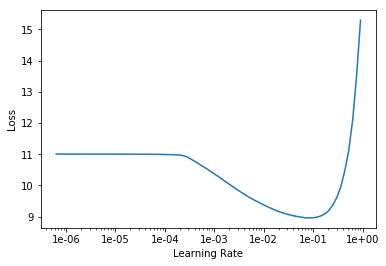

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.885980,4.726018,0.376665,07:17


In [13]:
learn.save('first', with_opt=True)

In [14]:
learn.load('first', with_opt=True);

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.775585,4.672848,0.374132,07:17
1,4.651245,4.545925,0.377620,07:17
2,4.510017,4.401812,0.384027,07:17
3,4.192162,4.284790,0.390445,07:18
4,4.051014,4.262812,0.391998,07:18


In [17]:
learn.save('second_ml_lm', with_opt=True)

In [18]:
learn.load('second_ml_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45151 items)
x: LMTextList
xxup eng xxunk മുസ്ലീങ്ങളുടെ വിശുദ്ധ ഗ്രന്ഥമായ ഖുർആനിലെ xxunk അദ്ധ്യായമാണ് xxunk . അവതരണം : മദീനയിൽ സൂക്തങ്ങൾ : xxup num,xxup eng xxunk xxunk , xxunk , xxunk എന്നെല്ലാം അറിയപ്പെടുന്ന xxunk പശ്ചിമഘട്ടത്തിലെ ഒരു xxunk . . xxup num മീറ്റർ വരെ ഉയരം വയ്ക്കുന്ന വലിയ മരം . കേരളത്തിലെ കോട്ടൂർ റിസർവ് xxunk xxunk കാണി വർഗ്ഗക്കാരുടെ xxunk xxunk xxunk xxunk xxunk . എല്ല് xxunk xxunk തടിയുടെ പുറത്തുള്ള xxunk തൊലി നീക്കം ചെയ്തതിനുശേഷം തടി ചതച്ച് വെള്ളം xxunk എല്ല് നേരെ xxunk അതിനു പുറമേ xxunk ചെയ്യുന്നത് .,xxup eng xxunk ഇന്ത്യൻ ജനത xxunk വടക്കേ അമേരിക്കയിൽ xxunk xxunk ഭാഷ xxunk തദ്ദേശീയ അമേരിക്കൻ ഇന്ത്യൻ വംശക്കാരുടെ ഒരു കൂട്ടമാണ് . ചരിത്രപരമായി ഇവർ ജീവിച്ചിരുന്ന മേഖല , xxunk തടാകത്തിന് xxunk . ഈ ജനത , xxup num നും xxup num ും ഇടയ്ക്കു നടന്ന അമേരിക്കൻ xxunk മുമ്പ് xxunk ഏറ്റവും പടിഞ്ഞാറേ അറ്റത്ത് ന്യൂയോർക്ക് പ്രദേശത്ത് നിലവിലിരുന്ന സിക്സ് നേഷൻസ് അഥവാ xxunk ലീഗ് എന്നറിയപ്പെട്ടിരുന്ന ദീർഘകാല xxunk . xxunk ലീഗിലെ മറ്റ് 

In [19]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.863937,4.265410,0.391604,07:18
1,3.923150,4.264031,0.391966,07:18
2,3.896065,4.264349,0.391977,07:18
3,3.924476,4.260607,0.392624,07:18
4,3.939856,4.258401,0.393092,07:19
5,3.821697,4.257850,0.393012,07:19
6,3.844699,4.255940,0.393154,07:19
7,3.738203,4.255107,0.393372,07:18
8,3.743658,4.257968,0.393057,07:19
9,3.704357,4.259222,0.392991,07:19


In [20]:
learn.save('third_ml_lm', with_opt=True)